# Laboratory #01 : Image Operators and Filters

At the end of this laboratory, you would get familiarized with

*   Image Handling
*   Image Manipulation
*   Histogram and Histogram Equalization
*   Basic filtering techniques

### **Remember this is a graded exercise.**

*   For every plot, make sure you provide appropriate titles, axis labels, legends, wherever applicable.
*   Add sufficient comments and explanations wherever necessary.

---


Authors:

* Joaquim Marset Alsina
* Jesús Molina Rodríguez de Vera

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
!cd "/content/drive/MyDrive/CV - Lab/"

In [ ]:
!cd "/content/drive/MyDrive/CV - Lab/"; mkdir -p "Lab6"; cd "Lab6"; unzip "/content/drive/MyDrive/CV - Lab/p3_face_detection_and_recognition.zip"

Se han truncado las últimas 5000 líneas del flujo de salida.
 extracting: images/train_data/non_faces/B20_03806.png  
 extracting: images/train_data/non_faces/B20_03807.png  
 extracting: images/train_data/non_faces/B20_03808.png  
 extracting: images/train_data/non_faces/B20_03809.png  
 extracting: images/train_data/non_faces/B20_03810.png  
 extracting: images/train_data/non_faces/B20_03811.png  
 extracting: images/train_data/non_faces/B20_03812.png  
 extracting: images/train_data/non_faces/B20_03813.png  
 extracting: images/train_data/non_faces/B20_03814.png  
 extracting: images/train_data/non_faces/B20_03815.png  
 extracting: images/train_data/non_faces/B20_03816.png  
 extracting: images/train_data/non_faces/B20_03817.png  
 extracting: images/train_data/non_faces/B20_03818.png  
 extracting: images/train_data/non_faces/B20_03819.png  
 extracting: images/train_data/non_faces/B20_03820.png  
 extracting: images/train_data/non_faces/B20_03821.png  
 extracting: images/train_d

In [ ]:
# Loading necessary libraries (Feel free to add new libraries if you need for any computation)


import numpy as np #needed to manage numerical arrays and matrices
from matplotlib import pyplot as plt #needed in order to display images and graphics
import skimage
from skimage import data #needed in order to work with several presotred in skimage data
from skimage import exposure #the histogram is in this library
from skimage import filters # a lot of filters we will use are predefined, check it in https://scikit-image.org/docs/dev/api/skimage.filters.html
from skimage import io #we need it in order to read and store imahes
from skimage import morphology #morphology library has defined different 
from skimage import util # useful to convert images from one data type to another
from skimage import color

# Channels and color spaces

### **Exercise: Image Creation and Color Manipulation**

*   Create a 100 x 100 image for each of the below visualization

![black_and_white_patches.png](https://drive.google.com/uc?export=view&id=1Iuf870gS6DuFzMtnXs53DLuiXy0oARaw)

*   Visualize the created images in a 1 x 3 subplot using matplotlib.


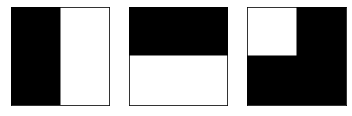

In [ ]:
# solution
# We use floating point images
c1 = np.zeros((100, 100))
c1[:, 50:] = 1.0 # The right half of the square has value equal to 1 (white)

c2 = np.zeros((100, 100))
c2[50:, :] = 1.0 # The bottom of the square has value equal to 1 (white)

c3 = np.zeros((100, 100))
c3[:50, :50] = 1.0 # The upper-left quarter of the square has value equal to 1 (white)

fig, axes = plt.subplots(1, 3)

for ax in axes:
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

axes[0].imshow(c1, cmap='gray')
axes[1].imshow(c2, cmap='gray')
axes[2].imshow(c3, cmap='gray')


*   Use the above three images to create the following image

![color_patches.png](https://drive.google.com/uc?export=view&id=1UxmFHToC4TUjgtB7UQMbB3DM3RIZlgBZ)

*Hint: Remember channels and color spaces*

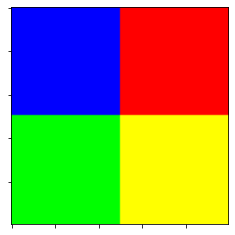

In [ ]:
# solution
# We use the aboe created images as the channels of the new image to create the desired figure
img_color = np.zeros((100, 100, 3))
img_color[:, :, 0] = c1 
img_color[:, :, 1] = c2
img_color[:, :, 2] = c3

ax = plt.gca()
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])

# By using the next commented line, we could produce an image wiht no border at all.
# However, we have decided to keep the axes without labels to reproduce the example image.
# plt.axis('off')

plt.imshow(img_color)

### **Exercise: Color Manipulation**

*   Read the image 'sillas.jpg' from the  folder 'images'

![sillas.jpg](https://drive.google.com/uc?export=view&id=1Ged9FdDWIcipbNxNatGgCZyRdQvcGtoG)

*   Extract individual channels and plot them using the matplotlib subplots command.



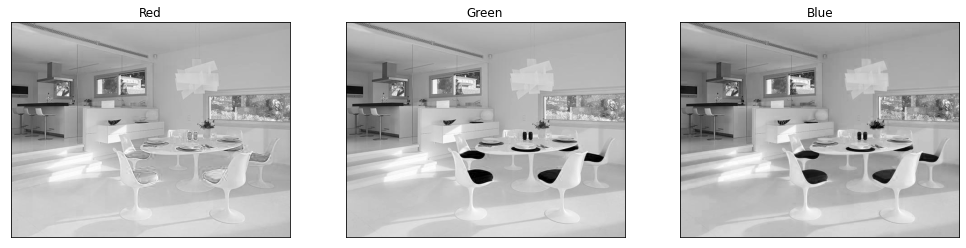

In [ ]:
# solution

# We read the image
img_chair = plt.imread("/content/drive/MyDrive/CV - Lab/Lab 2 Image Operators and Filters-20211005/images/sillas.jpg")
# Extract the 3 channels R G B
img_chair_r = img_chair[:, :, 0]
img_chair_g = img_chair[:, :, 1]
img_chair_b = img_chair[:, :, 2]

# Create a subplit with 1 row and 3 columns and plot the channels
fig, axes = plt.subplots(1, 3)
fig.set_size_inches(17, 10)

for ax in axes:
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

# Plot the three channels as grayscale images
axes[0].imshow(img_chair_r, cmap='gray')
axes[0].set_title("Red")
axes[1].imshow(img_chair_g, cmap='gray')
axes[1].set_title("Green")
axes[2].imshow(img_chair_b, cmap='gray')
axes[2].set_title("Blue");

*   The color **red** looks too bright for the eyes. Isn't it?? Lets change the color and see how it appears.
    *    Create a new image where everything that is **'red' is changed to 'blue'**.
*   Visualize the original image and the created image using  the matplotlib subplots command.

Text(0.5, 1.0, 'Channels exchanged')

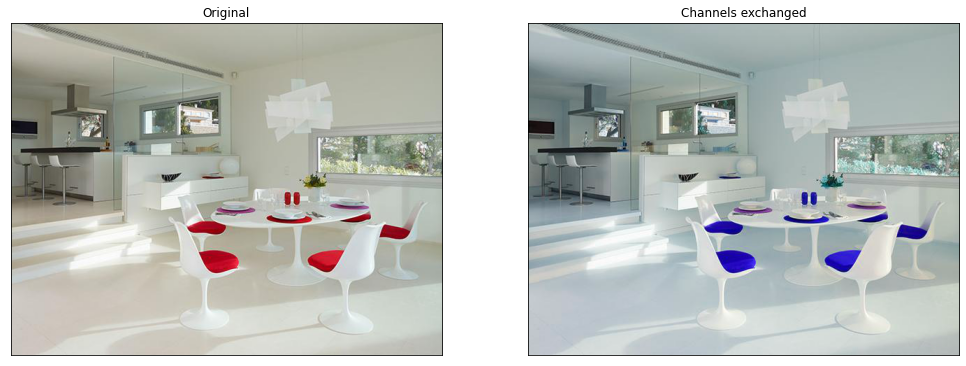

In [ ]:
# solution

# We are going to exchange the red and blue channels, so that everything that is red in the image will be blue and vice versa.
img_chair_exch = np.zeros_like(img_chair)
img_chair_exch[:, :, 0] = img_chair_b
img_chair_exch[:, :, 1] = img_chair_g
img_chair_exch[:, :, 2] = img_chair_r

fig, axes = plt.subplots(1, 2)
fig.set_size_inches(17, 10)

for ax in axes:
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

# Plot both versions
axes[0].imshow(img_chair)
axes[0].set_title("Original")
axes[1].imshow(img_chair_exch)
axes[1].set_title("Channels exchanged")

# Image Manipulation

### **Exercise: Image Operators**

*   You can find images 'model.png' and 'coat.png' in the images folder (First two images of the below visualization). Your task is to create an image from the given two images such a way that the model is wearing the coat (Third image in the visualization).
*   You can also find different textures in the images folder. Your task is to change the coat texture to any one of the given textures.
*   Visualize the images similar to the given visualization.

*Hint: Think how to apply image masks!!!*

![model_and_coat.png](https://drive.google.com/uc?export=view&id=1DOieJOrfwe34z0-3EEBVyX1Ac45sb5SN)


In [ ]:
# solution
img_coat = plt.imread("/content/drive/MyDrive/CV - Lab/Lab 2 Image Operators and Filters-20211005/images/coat.png")
img_model = plt.imread("/content/drive/MyDrive/CV - Lab/Lab 2 Image Operators and Filters-20211005/images/model.png")
img_texture = plt.imread("/content/drive/MyDrive/CV - Lab/Lab 2 Image Operators and Filters-20211005/images/texture2.png")

According to the shapes of the images loaded, the images `img_coat` and `img_model` have an alpha channel (for transparency), but `img_texture` has not that channel:

In [ ]:
print(img_coat.shape)
print(img_model.shape)
print(img_texture.shape)

(1188, 915, 4)
(1188, 915, 4)
(1188, 915, 3)


In [ ]:
print(np.unique(img_coat[:,:,3]))
print(np.unique(img_model[:,:,3]))

[1.]
[1.]


However, the alpha channel of those two images is always 1, that is, no transparency is applied. Therefore, and for the saake of simplicity, we are going to remove that fourth channel that does not provide any relevant information.

In [ ]:
img_coat = img_coat[:,:,:3]
img_model = img_model[:,:,:3]

# Create copies to avoid modifying the original image
img_model_yellow = img_model.copy()
img_model_texture = img_model.copy()

In [ ]:
# Create a mask to access only the positions in which the coat image is not black
# Use the sum because it could happen that some channel is zero but the others no
# We are interested in the pixels in which any channel is greater than zero
mask = img_coat.sum(axis=2) != 0 
img_model_yellow[mask, :] = img_coat[mask, :]
img_model_texture[mask, :] = img_texture[mask, :]

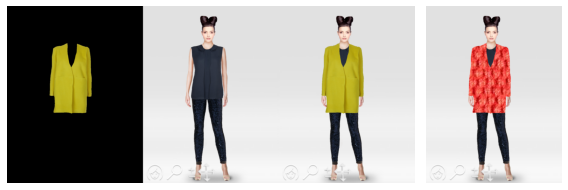

In [ ]:
# We force the first subplot to be three times wider than the second subplot (it will contain 3 images concatenated)
fig, axes = plt.subplots(1, 2, gridspec_kw={'width_ratios': [3, 1]})

fig.set_size_inches(8, 5)

for ax in axes:
  ax.axis("off")

# In order to reproduce the target image, we are going to concatenate three of the images to avoid the presence of margings between them
img_concat = np.concatenate((img_coat, img_model, img_model_yellow), axis=1)

axes[0].imshow(img_concat)
axes[1].imshow(img_model_texture)

# Reduce margin between the 2 subplots
fig.tight_layout()

# Contrast Enhancement

### **Exercise: Histogram Computation**

*   Read the **'astronaut' image** from data module.
*   Convert the image to grayscale.
*   Compute the **histogram of the image.** *Hint: histogram function is available in skimage.exposure package*
*   Plot the histogram using matplotlib plot.




Text(0, 0.5, 'Pixel Intensity Frequencies')

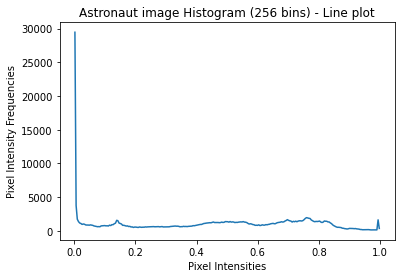

In [ ]:
# solution
img_astronaut = data.astronaut()
img_astronaut_gray = color.rgb2gray(img_astronaut)

histogram = exposure.histogram(img_astronaut_gray)


plt.plot(histogram[1], histogram[0])
plt.title("Astronaut image Histogram (256 bins) - Line plot")
plt.xlabel("Pixel Intensities")
plt.ylabel("Pixel Intensity Frequencies")

*   Change the bin count to 8 and compute the histogram of the image and plot the computed histogram using the matplotlib plot command and the matplotlib bar command..

(0.0, 61330.65)

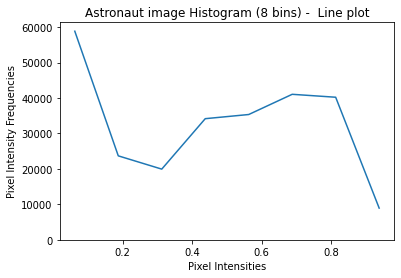

In [ ]:
# solution
histogram_8 = exposure.histogram(img_astronaut_gray, nbins=8)
plt.plot(histogram_8[1], histogram_8[0])
plt.title("Astronaut image Histogram (8 bins) -  Line plot")
plt.xlabel("Pixel Intensities")
plt.ylabel("Pixel Intensity Frequencies")
ax = plt.gca()
ax.set_ylim([0, None]) # Ensure the vertical axis starts at 0

Text(0, 0.5, 'Pixel Intensity Frequencies')

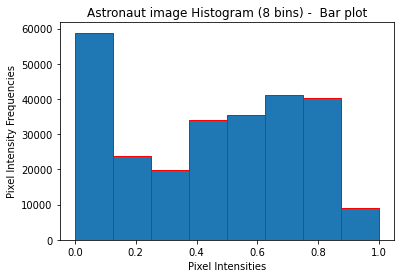

In [ ]:
# We have to force the width of the bars to plot it properly
width = np.diff(histogram_8[1]).min()
plt.bar(histogram_8[1], histogram_8[0], width=width, edgecolor = 'red')
plt.title("Astronaut image Histogram (8 bins) -  Bar plot")
plt.xlabel("Pixel Intensities")
plt.ylabel("Pixel Intensity Frequencies")



*   What happens when you change the bin count? Does your inference change based on the bin count? If yes, then how do you define the correct bin count.
*   What happens when the bin count is very low and what happens when it is very high?



**Solution**

The shape of the histogram clearly changes after changing the bin count. Therefore, the two histograms seem to represent completely different values distributions even if they have been obtained from the same image.

For example, in the first case (`nbins=256`) we can appreciate a huge difference between the number of occurrences of $0$ and the rest of the values. This difference is smaller in the second case (`nbins=8`). In general, the second histogram reveals the accumulation of occurrences in certain ranges that cannot be appreciated in the first histogram because of the great differences in the scale.

There exist [some methods](https://en.wikipedia.org/wiki/Histogram#Number_of_bins_and_width) that, given a dataset, estimate which is the "best" number of bins for the histogram. For example, the Sturge’s rule that only takes into account the number of elements of the dataset:

$$
bins = 1+ceil(log_2(n))
$$

However, it looks like there is not an optimal number of bins, and that different bin counts can lead to different analyses of the data.

If the bin count is very low, we can lose important information, and there wouldn't be enough details to analyze the underlying distribution.

When the bin count is very high, there is a risk that the resulting histogram looks sharp and with peaks, and that it captures a lot of noise (which will be difficult to differentiate from the data).

*   Compute the histogram of the color image (without converting it to grayscale).
*   Plot the total histogram as well as the histogram for each channel (show them  with the corresponding titles for each histogram).


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  This is separate from the ipykernel package so we can avoid doing imports until


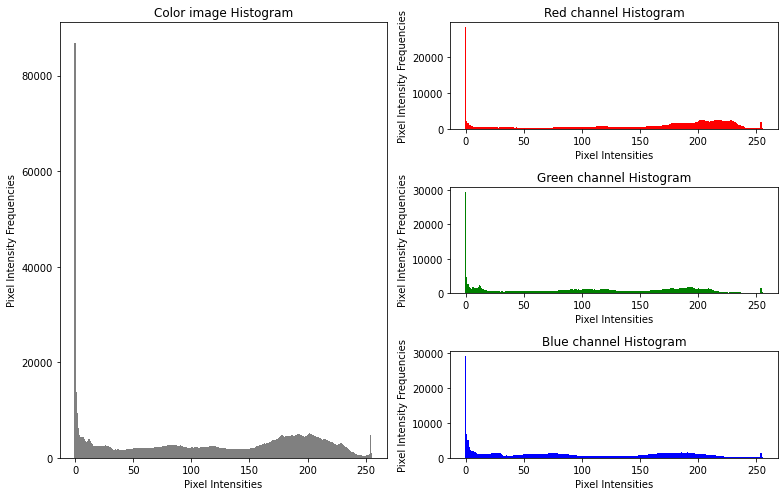

In [ ]:
#solution
# Histogram of the overall image
histogram_color = exposure.histogram(img_astronaut)

# Compute histogram for each channel
histogram_r = exposure.histogram(img_astronaut[:, :, 0])
histogram_g = exposure.histogram(img_astronaut[:, :, 1])
histogram_b = exposure.histogram(img_astronaut[:, :, 2])

plt.figure(figsize=(11, 7))

# Plot the 4 histograms
ax1 = plt.subplot2grid((3, 2), (0, 0), rowspan=3)
ax1.bar(histogram_color[1], histogram_color[0], width=1, color="grey")
ax1.set_title("Color image Histogram")

ax2 = plt.subplot2grid((3, 2), (0, 1))
ax2.bar(histogram_r[1], histogram_r[0], width=1, color="red")
ax2.set_title("Red channel Histogram")

ax3 = plt.subplot2grid((3, 2), (1, 1))
ax3.bar(histogram_g[1], histogram_g[0], width=1, color="green")
ax3.set_title("Green channel Histogram")

ax4 = plt.subplot2grid((3, 2), (2, 1))
ax4.bar(histogram_b[1], histogram_b[0], width=1, color="blue")
ax4.set_title("Blue channel Histogram")

ax1.set_xlabel("Pixel Intensities")
ax2.set_xlabel("Pixel Intensities")
ax3.set_xlabel("Pixel Intensities")
ax4.set_xlabel("Pixel Intensities")
ax1.set_ylabel("Pixel Intensity Frequencies")
ax2.set_ylabel("Pixel Intensity Frequencies")
ax3.set_ylabel("Pixel Intensity Frequencies")
ax4.set_ylabel("Pixel Intensity Frequencies")

plt.tight_layout()

### **Exercise: Histogram Equalization**

*   Read 'aquatermi_lowcontrast.jpg' image from the images folder.
*   Compute the histogram of the image.
*   Perform histogram equalization of the image to enhance the contrast. *Hint: Use equalize_hist function available in skimage.exposure*
*   Also compute histogram of the equalized image.
*   Use 2 x 2 subplot to show the original image and the enhanced image along with the corresponding histograms.



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/skimage/exposure/exposure.py:181: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  hist, bin_centers = histogram(image, nbins)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  


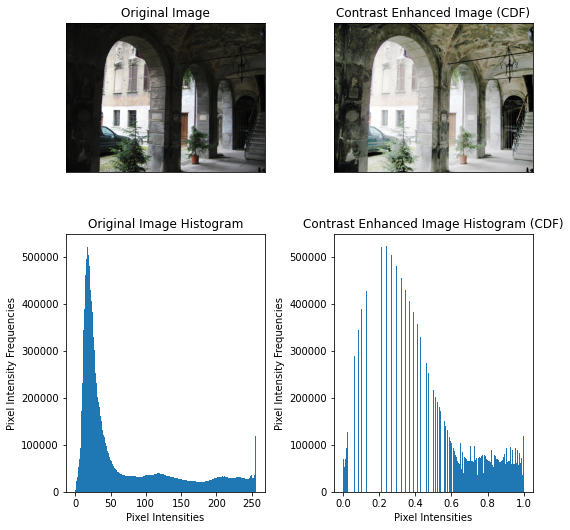

In [ ]:
# solution
img_aquatermi = plt.imread("/content/drive/MyDrive/CV - Lab/Lab 2 Image Operators and Filters-20211005/images/aquatermi_lowcontrast.jpg")
# Compute the histogram of the original image
histogram_lowcontrast = exposure.histogram(img_aquatermi)
# The following line flattens the image and uses the resulting histogram, regardless of the channel
img_aquatermi_equalized = exposure.equalize_hist(img_aquatermi);
# Compute the histogram of the equalized image
histogram_equalized = exposure.histogram(img_aquatermi_equalized);
fig, axes = plt.subplots(2, 2)

fig.set_size_inches(8, 8)

for ax in axes[0, :]:
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

for ax in axes[1, :]:
    ax.set_xlabel("Pixel Intensities")
    ax.set_ylabel("Pixel Intensity Frequencies")

# Plot the results
width_equalized = np.diff(histogram_equalized[1]).min()

axes[0, 0].imshow(img_aquatermi);
axes[1, 0].bar(histogram_lowcontrast[1], histogram_lowcontrast[0], width=1)
axes[0, 1].imshow(img_aquatermi_equalized)
axes[1, 1].bar(histogram_equalized[1], histogram_equalized[0], width=width_equalized)

axes[0, 0].set_title("Original Image")
axes[1, 0].set_title("Original Image Histogram")
axes[0, 1].set_title("Contrast Enhanced Image (CDF)")
axes[1, 1].set_title("Contrast Enhanced Image Histogram (CDF)")

fig.tight_layout();

**Important note**: we have applied the histogram equalization to the full color image because we understand that it is what the exercises asked. However, this approach is not the most suitable given that when equalizing the 3-channel image, the method `equalize_hist` simply flattens the image, and any information about the different channels is lost.

Another option could be applying the histogram equalization in a channel-wise way, that is, equalizing each one of the RGB channels indepently and then combining the resulting images to compose the final one.

Finally, we think that another option that could lead to better results is converting the RGB image to another color space, like HSV, and equalize just the "value" or "brightness" channel (V). This approach seems to be more similar to the idea behind histogram equalization for grayscale images.


*   The above function in skimage.exposure uses cumulative distribution function and interpolation technique to normalize the histogram. How is it different from linear contrast stretch (contrast enhancement - see theory slides)?


**Solution**

The linear contrast stretch that we have seen in theory consists in mapping the original intensity values into a different (generally, wider) range. Therefore, the new *shape* of the histogram is the result of stretching the old one. In this case, there is a one-to-one relationship between the original and the new values (non-null linear functions are bijective). Because of how it works, if the image takes the minimum and maximum values of the destination range, the image won't change. For example, if consider the `aquatermi_lowcontrast.jpg` image, which takes the values $0$ and $255$, the linear stretching would result in:

$$
BV_{out} = \Big( \frac{BV_{in} - 0}{255 - 0} \Big)\cdot 255 = BV_{in}
$$  

In the case of the function `skimage.exposure.equalize_hist`, the approach is based on the usage of the cumulative distribution function of the image. As a reminder, the cumulative distribution function of a random variable $X$, $cdf_X(\cdot)$, is a function that if evaluated in $x$, its value is the probability of $X$ being less than or equal to $x$. 
According to the [source code](https://github.com/scikit-image/scikit-image/blob/main/skimage/exposure/exposure.py#L349-L385), what this function is doing is trying to *flatten* the histogram of the image by *linearising* the cumulative distribution function of the output image. It is changing the probability distribution of the intensity values of the image. In the plot below we can see this in a particular example.

/usr/local/lib/python3.7/dist-packages/skimage/exposure/exposure.py:181: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  hist, bin_centers = histogram(image, nbins)
/usr/local/lib/python3.7/dist-packages/skimage/exposure/exposure.py:181: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  hist, bin_centers = histogram(image, nbins)


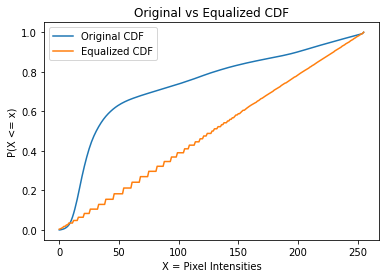

In [ ]:
plt.plot(exposure.cumulative_distribution(img_aquatermi)[0], label="Original CDF")
plt.plot(exposure.cumulative_distribution(img_aquatermi_equalized)[0], label="Equalized CDF")
plt.title('Original vs Equalized CDF')
plt.xlabel('X = Pixel Intensities')
plt.ylabel('P(X <= x)')
plt.legend()

### **Exercise: Linear Contrast Stretch**

*   Write a function to compute the linear contrast stretch or contrast enhancement (Do not use an inbuilt function). 
*   Provide grayscale image array and the bin count as parameters to the function and return the enhanced image array.
*   Use a 2 x 2 plot to visualize the original image, histogram, enhanced image and the corresponding histogram.



As we have explained before, the Linear Contrast Stretch (LCS) method maps the range of intensity values the pixel can take to a wider range. It first normalizes the image to the range [0, 1], and then it applies a linear transformation to scale the pixels to another range, typically [0, 255] if the image is `uint8`.

Therefore, in this exercise, we are only using the bin count for the visualization purpose of the histogram of the image before and after applying the LCS. Given that the function that we must implement only has to apply LCS and return the resulting image, the representation of the histograms will be performed outside such function. Therefore, the bin count parameter is not required for this function.

However, what we need is the range the obtained image pixels will take. That is, the $quant_k$ parameter we saw in class, that often will be $255$ (if the image is `uint8`), considering the other range end to be $0$.
For this reason, we are going to consider that extra demand parameter to be this $quant_k$, that we will give a default value of $255$.

Additionally to the 2 parameters requested by the exercise, we have added an optional third one to manipulate the dtype of the image array that is returned.

Finally, we have decided to create an additional auxiliary function to handle this representation.



In [ ]:
def linear_contrast_stretch(img, output_max_brightness=255, output_dtype=None):
    """
    img: the image array
    output_max_brightness: is the max brightness value the resulting image will take
            Equivalent to the quant_k parameter of the formula.
    output_dtype: dtype of the output array. If None, the dtye of the orignal image is used
    """
    output_dtype = output_dtype or img.dtype
    min = np.min(img)
    max = np.max(img)
    result = output_max_brightness * ((img - min) / (max - min))
    return np.asarray(result, dtype=output_dtype)

def apply_lcs_and_compare(img, bin_count):
    # Apply LCS
    img_stretch = linear_contrast_stretch(img)
    # Compute the original of the equalized image
    histogram = exposure.histogram(img, nbins=bin_count)
    # Compute the histogram of the equalized image
    histogram_stretch = exposure.histogram(img_stretch, nbins=bin_count)

    fig, axes = plt.subplots(2, 2)

    fig.set_size_inches(8,8)

    for ax in axes[0,:]:
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    for ax in axes[1, :]:
        ax.set_xlabel("Pixel Intensities")
        ax.set_ylabel("Pixel Intensity Frequencies")

    # Plot the results
    axes[0,0].imshow(img);
    axes[1,0].bar(histogram[1], histogram[0], width=np.diff(histogram[1]).min())
    axes[0,1].imshow(img_stretch)
    axes[1,1].bar(histogram_stretch[1], histogram_stretch[0], width=np.diff(histogram_stretch[1]).min())

    axes[0, 0].set_title("Original Image")
    axes[1, 0].set_title("Original Image Histogram")
    axes[0, 1].set_title("Contrast Enhanced Image (LCS)")
    axes[1, 1].set_title("Contrast Enhanced Image Histogram (LCS)")

    fig.tight_layout();

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.


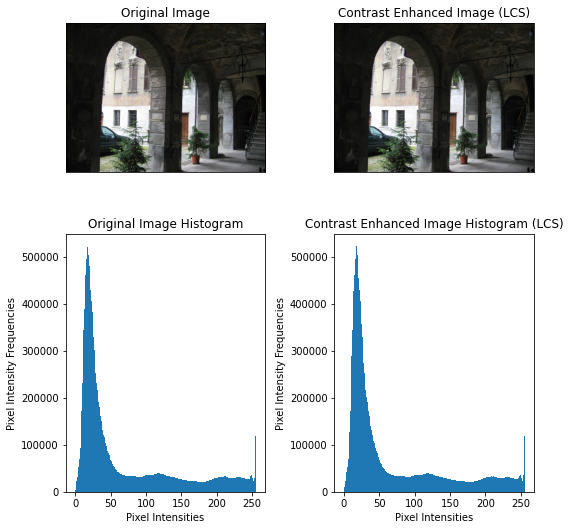

In [ ]:
apply_lcs_and_compare(img_aquatermi, 256)

In [ ]:
np.alltrue(img_aquatermi==linear_contrast_stretch(img_aquatermi))

True

As we had previously stated, given that this image takes the extreme values $0$ and $255$, the function `linear_contrast_stretch()` does not change it.

# Filters

### **Exercise: Mean Filter**

*   Load the **coins** image from the data module.
*   Define a disk structuring element (command selem) of radius 20. *Hint: Structuring elements (command selem) are defined in the skimage.morphology module*
*   Use mean filter using the created selem. *Hint: The mean filter is available in skimage.filters.rank module*
*   Increase the radius of the selem by 10 and apply the mean filter.
*   Reduce the radius of the selem by 10 and apply the mean filter.
*   Visualize all the smoothened images along with the original image.




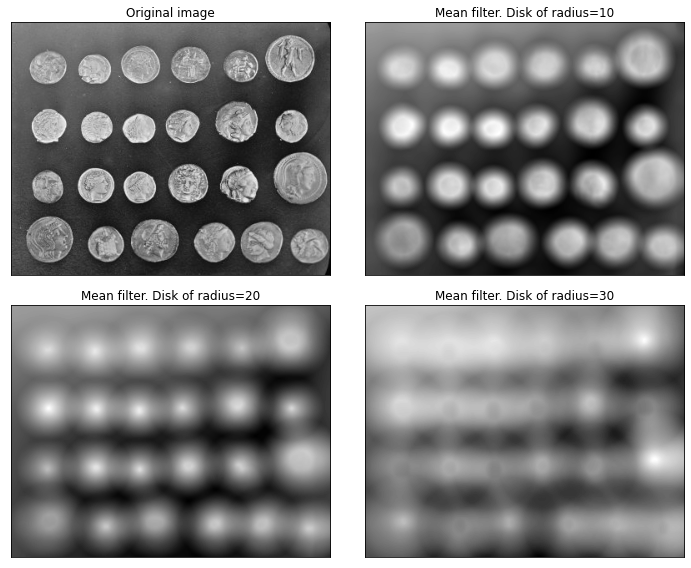

In [ ]:
# solution
# Load the image
img_coins = data.coins()

# Plot the results
fig, axes = plt.subplots(2, 2)
fig.set_size_inches(10, 8)

for ax in axes.flatten():
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

axes[0, 0].imshow(img_coins, cmap='gray')
axes[0, 0].set_title("Original image")

radii = [10, 20, 30]
for i, r in enumerate(radii):
    j = i+1
    img_coins_mean = filters.rank.mean(img_coins, morphology.selem.disk(r))
    axes[j//2, j%2].imshow(img_coins_mean, cmap="gray")
    axes[j//2, j%2].set_title(f"Mean filter. Disk of radius={r}")

fig.tight_layout()

*   Use different selem (square, rectangle, star, diamond) to view the behaviour of the mean filter (It is not necessary to repeat with different sizes; it is sufficient to show the one with optimal parameter).
*   Create a 2 x n subplot to show the selem in the first row and the corresponding smoothened image in the second row.

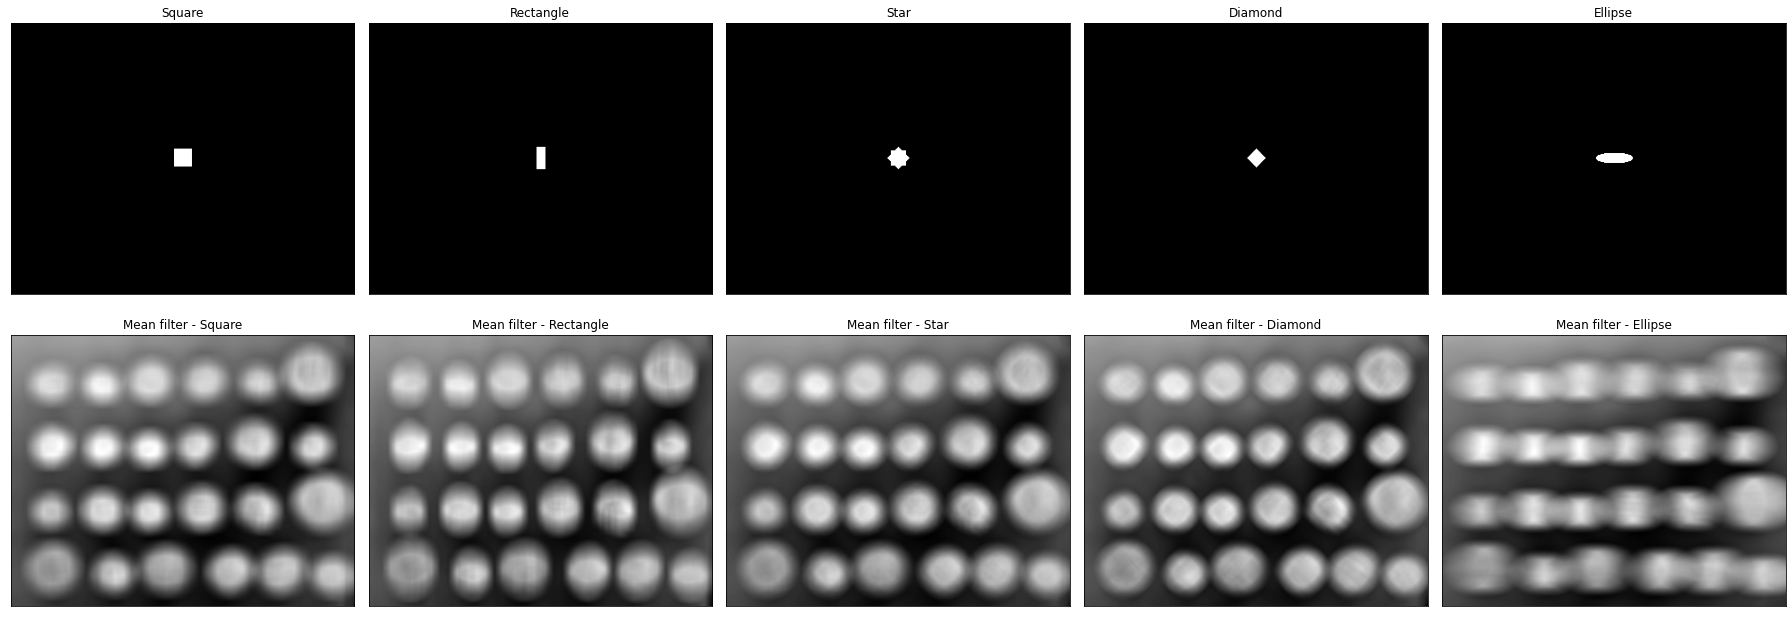

In [ ]:
# solution

def draw_selem(img_shape, selem):
    """
    Auxiliary function that creates a blank image (black) of a given shape and draws
      in its center the selem passed as an argument
    """
    i1, i2 = img_shape
    s1, s2 = selem.shape

    result = np.zeros(img_shape)

    m1 = i1//2
    m2 = i2//2

    result[m1-s1//2:m1+s1-s1//2, m2-s2//2:m2+s2-s2//2] = selem
    return result

# Plot the results
fig, axes = plt.subplots(2, 5)
fig.set_size_inches(25, 9)

for ax in axes.flatten():
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)


def plot_selem_and_image(ax, img, selem):
    img_selem = draw_selem(img.shape, selem)
    img_filtered = filters.rank.mean(img, selem)
    ax[0].imshow(img_selem, cmap="gray")
    ax[1].imshow(img_filtered, cmap="gray")


axes[0, 0].set_title("Square")
axes[1, 0].set_title("Mean filter - Square")
plot_selem_and_image(axes[:, 0], img_coins, morphology.selem.square(20))

axes[0, 1].set_title("Rectangle")
axes[1, 1].set_title("Mean filter - Rectangle")
plot_selem_and_image(axes[:, 1], img_coins, morphology.selem.rectangle(25,10))

axes[0, 2].set_title("Star")
axes[1, 2].set_title("Mean filter - Star")
plot_selem_and_image(axes[:, 2], img_coins, morphology.selem.star(8))

axes[0, 3].set_title("Diamond")
axes[1, 3].set_title("Mean filter - Diamond")
plot_selem_and_image(axes[:, 3], img_coins, morphology.selem.diamond(10))

axes[0, 4].set_title("Ellipse")
axes[1, 4].set_title("Mean filter - Ellipse")
plot_selem_and_image(axes[:, 4], img_coins, morphology.selem.ellipse(20, 5))

fig.tight_layout()

*   How does changing the radius of disk affect the smoothing functionality?

**Solution**

When the size of the disk increases, the resulting image is more blurred. This is because pixels that are farther from the centre are contributing as much as the central pixels, leading to the loss of details (local information).

  * What is the observed behaviour with different structuring element?



**Solution**

The main difference that we can observe is between the rectangle and the ellipse and the other elements. As the rectangle is higher than wither, the resulting image is more blurred in the vertical axis. That is, the blurred coins are deformed so that they are higher than wider (while they originally were circles). In the case of the ellipse, we observe the same pattern in the horizontal axis.

Regarding the other three structuring elements, the resulting images are more similar to each other. However, it is possible to appreciate the influence of the shape of the filter. If we zoom in to each one of these three images, we see how:
- Square: the interior of the coins present a *square* pattern, especially visible in the third and second row of coins.
- Star: we observe now a pattern of a star inside the coins.
- Diamond: we see also a pattern, that now is a diamond.

Moreover, if we look back to the results of the last exercise (mean filter using disks), in the case of the radius of 20 pixels (more similar in size to the ones we are considering in this exercise) we can see how the interior of the coins present a pattern of concentric circles. 

These results reveal the importance that the shape of the filter has in the process. In this particular case in which the shape of the objects that appear in the image is a circle, we think that the disk would be the best option as it respects the original shape.



*   What is the difference between mean filter and gaussian filter?




**Solution**

In the mean fiter, all the positions contribute equally to the result. That is, the kernel is constant with value $\frac{1}{n}$ where n is the number of pixels of the kernel:
$$
h(u,v) = \frac{1}{n}
$$
In other words, it is a simple average operation.

On the other hand, the values of the Gaussian filter are obtained from a 2D Gaussian function:
$$
h(u,v) = \frac{1}{2\pi\sigma^2} e^{-\frac{u^2+v^2}{\sigma^2}},
$$
that is parametrized by the size of the kernel and the variance ($\sigma$) of the Gaussian distribution. This kernel takes its maximum value in the central pixel of the kernel ($u=v=0$), and it decreases monotonically as we move away from the center. That is, the central pixels contribute more to the final result.




---

## **End of P1: Image operators and filters**

Deadline for P1 submission in CampusVirtual is: **Monday, the 18th of October, 2021**
